In [1]:
#Importing the pandas library
import pandas as pd

In [57]:
#pip install xgboost

In [181]:
df=pd.read_csv("train_advanced.csv")

In [182]:
df.describe()

,Item,Sales,Average Rating
count,821000.000000,821000.000000,821000.000000
mean,25.500000,51.225683,2.559460
std,14.430878,28.208462,1.225893
min,1.000000,0.000000,0.000000
25%,13.000000,29.000000,1.600000
50%,25.500000,46.000000,2.600000
75%,38.000000,68.000000,3.500000
max,50.000000,214.000000,5.000000


In [183]:
df.describe(include=['O'])

,Date,Store,Location,Category,Branding
count,821000,821000,820260,821000,821000
unique,1642,10,10,9,23
top,9/21/2017,Coles,"Springvale, VIC, 3171, Australia",Electronics,Nike
freq,500,82100,82100,114940,65680


In [184]:
#Correcting the anomaly in the date column
df['Date']=df['Date'].apply(lambda x: x.split('/'))
df['Date']=df['Date'].apply(lambda x : (x[1],x[0],x[2]) if (int(x[0])<int(x[1])) else (x[0],x[1],x[2]) )
df['Date']=df['Date'].apply(lambda x: (x[0]+'/'+x[1]+'/'+x[2]))


In [185]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])

In [367]:
#df['year']=df['Date'].dt.year 
#df['month']=df['Date'].dt.month 
df['day']=df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['dayofweek'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofyear'] = df['Date'].dt.dayofyear
df['dayofmonth'] = df['Date'].dt.day
df['weekofyear'] = df['Date'].dt.weekofyear

In [187]:
df.isnull().sum()

Date                0
Store               0
Item                0
Sales               0
Average Rating      0
Location          740
Category            0
Branding            0
hour                0
dayofweek           0
quarter             0
month               0
year                0
dayofyear           0
dayofmonth          0
weekofyear          0
dtype: int64

In [8]:
#plotting a graph between year and sales
import matplotlib.pylab as plt
#plt.scatter(df['Sales'],df['month'])


In [9]:
#df['year'].value_counts()

In [189]:
df.describe()

,Item,Sales,Average Rating,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
count,821000.000000,821000.000000,821000.000000,821000.0,821000.000000,821000.000000,821000.000000,821000.000000,821000.000000,821000.000000,821000.000000
mean,25.500000,51.225683,2.559460,0.0,2.993301,2.666261,7.040195,2018.776492,197.972594,14.866017,28.696711
std,14.430878,28.208462,1.225893,0.0,2.001664,1.099527,3.387065,1.313515,101.539869,9.611602,14.544723
min,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,2017.000000,1.000000,1.000000,1.000000
25%,13.000000,29.000000,1.600000,0.0,1.000000,2.000000,4.000000,2018.000000,115.000000,5.000000,17.000000
50%,25.500000,46.000000,2.600000,0.0,3.000000,3.000000,7.000000,2019.000000,203.000000,16.000000,29.000000
75%,38.000000,68.000000,3.500000,0.0,5.000000,4.000000,10.000000,2020.000000,286.000000,23.000000,41.000000
max,50.000000,214.000000,5.000000,0.0,6.000000,4.000000,12.000000,2021.000000,366.000000,31.000000,53.000000


In [190]:
df[df['Location'].isnull()]

,Date,Store,Item,Sales,Average Rating,Location,Category,Branding,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
820260,2019-06-22,SupaIGA,50,83,0.0,NaN,Home & Kitchen,Westinghouse,0,5,2,6,2019,173,22,25
820261,2019-06-23,SupaIGA,50,78,0.6,NaN,Home & Kitchen,Westinghouse,0,6,2,6,2019,174,23,25
820262,2019-06-24,SupaIGA,50,101,0.8,NaN,Home & Kitchen,Westinghouse,0,0,2,6,2019,175,24,26
820263,2019-06-25,SupaIGA,50,82,1.1,NaN,Home & Kitchen,Westinghouse,0,1,2,6,2019,176,25,26
820264,2019-06-26,SupaIGA,50,97,0.4,NaN,Home & Kitchen,Westinghouse,0,2,2,6,2019,177,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820995,2021-06-26,SupaIGA,50,82,0.4,NaN,Home & Kitchen,Westinghouse,0,5,2,6,2021,177,26,25
820996,2021-06-27,SupaIGA,50,83,0.8,NaN,Home & Kitchen,Westinghouse,0,6,2,6,2021,178,27,25
820997,2021-06-28,SupaIGA,50,91,2.0,NaN,Home & Kitchen,Westinghouse,0,0,2,6,2021,179,28,26
820998,2021-06-29,SupaIGA,50,122,1.9,NaN,Home & Kitchen,Westinghouse,0,1,2,6,2021,180,29,26


In [191]:
df.loc[df['Location'].isnull()==True,'Location']="Mulgrave VIC 3170"

In [192]:
#printing the dataframe by removing the NaN values from the Location column

df2=df.copy()
df2

,Date,Store,Item,Sales,Average Rating,Location,Category,Branding,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2017-01-01,KMart,1,13,2.8,Wheelers Hill VIC 3170,Electronics,Sony,0,6,1,1,2017,1,1,52
1,2017-02-01,KMart,1,11,1.4,Wheelers Hill VIC 3170,Electronics,Sony,0,2,1,2,2017,32,1,5
2,2017-03-01,KMart,1,14,1.8,Wheelers Hill VIC 3170,Electronics,Sony,0,2,1,3,2017,60,1,9
3,2017-04-01,KMart,1,13,1.3,Wheelers Hill VIC 3170,Electronics,Sony,0,5,2,4,2017,91,1,13
4,2017-05-01,KMart,1,10,2.9,Wheelers Hill VIC 3170,Electronics,Sony,0,0,2,5,2017,121,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820995,2021-06-26,SupaIGA,50,82,0.4,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,0,5,2,6,2021,177,26,25
820996,2021-06-27,SupaIGA,50,83,0.8,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,0,6,2,6,2021,178,27,25
820997,2021-06-28,SupaIGA,50,91,2.0,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,0,0,2,6,2021,179,28,26
820998,2021-06-29,SupaIGA,50,122,1.9,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,0,1,2,6,2021,180,29,26


In [193]:
#Now we print all the unique stores names
df2['Store'].unique()
#df2['Location'].unique()

array(['KMart', 'Target', 'Coles', 'Woolies', 'BigW', 'Aldi',
       'Asian SuperMart', 'Big Savers', 'Costco', 'SupaIGA'], dtype=object)

In [194]:
#Frequency before encoding
#Frequency use instead of label encoding
df2["Store"].value_counts()
df2.loc[df2['Store']=='Target','Store']=82100/len(df2)
df2.loc[df2['Store']=='Costco','Store']=82100/len(df2)
df2.loc[df2['Store']=='Big Savers','Store']=82100/len(df2)
df2.loc[df2['Store']=='Asian SuperMart','Store']=82100/len(df2)
df2.loc[df2['Store']=='Woolies','Store']=82100/len(df2)
df2.loc[df2['Store']=='BigW','Store']=82100/len(df2)
df2.loc[df2['Store']=='Aldi','Store']=82100/len(df2)
df2.loc[df2['Store']=='KMart','Store']=82100/len(df2)
df2.loc[df2['Store']=='Coles','Store']=82100/len(df2)
df2.loc[df2['Store']=='SupaIGA','Store']=81360/len(df2)

In [195]:
df2

,Date,Store,Item,Sales,Average Rating,Location,Category,Branding,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2017-01-01,0.1,1,13,2.8,Wheelers Hill VIC 3170,Electronics,Sony,0,6,1,1,2017,1,1,52
1,2017-02-01,0.1,1,11,1.4,Wheelers Hill VIC 3170,Electronics,Sony,0,2,1,2,2017,32,1,5
2,2017-03-01,0.1,1,14,1.8,Wheelers Hill VIC 3170,Electronics,Sony,0,2,1,3,2017,60,1,9
3,2017-04-01,0.1,1,13,1.3,Wheelers Hill VIC 3170,Electronics,Sony,0,5,2,4,2017,91,1,13
4,2017-05-01,0.1,1,10,2.9,Wheelers Hill VIC 3170,Electronics,Sony,0,0,2,5,2017,121,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820995,2021-06-26,0.099099,50,82,0.4,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,0,5,2,6,2021,177,26,25
820996,2021-06-27,0.099099,50,83,0.8,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,0,6,2,6,2021,178,27,25
820997,2021-06-28,0.099099,50,91,2.0,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,0,0,2,6,2021,179,28,26
820998,2021-06-29,0.099099,50,122,1.9,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,0,1,2,6,2021,180,29,26


In [196]:
df2["Branding"].value_counts()

Nike              65680
Zara              49260
Tommy Hilfiger    49260
Swisse            49260
Cadbury           49260
Westinghouse      49260
Kogan             49260
The Body Shop     32840
LG                32840
Reebok            32840
Olay              32840
Sistema           32840
Book Grocer       32840
Nestle            32840
Typo              32840
Wayfair           32840
Apple             32840
Kellogg's         32840
Sony              32840
Maybelline        16420
Puma              16420
Revlon            16420
MAC               16420
Name: Branding, dtype: int64

In [197]:
df2.loc[df2['Branding']=='Nike','Branding']=65680/len(df2)
df2.loc[((df2['Branding']=='Cadbury') | (df2['Branding']=='Tommy Hilfiger') |\
        (df2['Branding']=='Zara') |(df2['Branding']=='Kogan') | (df2['Branding']=='Swisse')),\
        'Branding']=49260/len(df2)

df2.loc[df2['Branding']=='Westinghouse', 'Branding']=48520/len(df2)


In [198]:
df2.loc[((df2['Branding']=='Apple') | (df2['Branding']=='Wayfair') |\
        (df2['Branding']=='Sistema') | (df2['Branding']=="Kellogg's") | (df2['Branding']=='Swisse' )),\
        'Branding']=32840/len(df2)
df2.loc[((df2['Branding']=='Nestle') | (df2['Branding']=='Typo') |\
        (df2['Branding']=='Olay') | (df2['Branding']=='Kogan') | (df2['Branding']=='The Body Shop')),\
        'Branding']=32840/len(df2)
df2.loc[((df2['Branding']=='Reebok') | (df2['Branding']=='Sony') |(df2['Branding']=='LG') |\
        (df2['Branding']=='Book Grocer')),\
        'Branding']=32840/len(df2)
df2.loc[((df2['Branding']=='Revlon') | (df2['Branding']=='MAC') |\
        (df2['Branding']=='Puma') | (df2['Branding']=='Maybelline')),\
        'Branding']=16420/len(df2)

In [199]:
#printing the changes in the dataframe
df2.describe(include=['O'])
#we have completed the frequency value replacement with Store and Branding and we can see the possible effect


,Store,Location,Category,Branding
count,821000.0,821000,821000,821000.00
unique,2.0,10,9,5.00
top,0.1,Mulgrave VIC 3170,Electronics,0.04
freq,738900.0,82100,114940,394080.00


In [200]:
df2["Category"].value_counts()
df2.loc[((df2['Category']=='Sports & Fitness') | (df2['Category']=='Health & Wellbeing') |\
        (df2['Category']=='Food & Groceries') | (df2['Category']=="Electronics") ),\
        'Category']=114940/len(df2)
df2.loc[df2['Category']=='Clothing & Accessories','Category']=98520/len(df2)
df2.loc[df2['Category']=='Cosmetics','Category']=49260/len(df2)
df2.loc[df2['Category']=='Home & Kitchen','Category']=81360/len(df2)
df2.loc[((df2['Category']=='Miscellaneous') | (df2['Category']=='Stationery')),\
        'Category']=65680/len(df2)



In [201]:
df2.describe(include=['O'])
#Now we do it for LOcation

,Store,Location,Category,Branding
count,821000.0,821000,821000.00,821000.00
unique,2.0,10,5.00,5.00
top,0.1,Mulgrave VIC 3170,0.14,0.04
freq,738900.0,82100,459760.00,394080.00


In [202]:
#First we get the unique value in  Location column
df2['Location'].unique()

array(['Wheelers Hill VIC 3170', 'Preston,\xa0VIC,\xa03072',
       'South Melbourne,\xa0VIC\xa03205',
       'Keysborough, VIC, 3173, Australia', 'Mulgrave\xa0VIC\xa03170',
       'Dandenong, VIC, 3175, Australia',
       'Springvale, VIC, 3171, Australia', 'Ringwood VIC 3134',
       ' Epping VIC 3076', 'Mulgrave VIC 3170'], dtype=object)

In [203]:
df2.loc[(df2['Location']=="Mulgrave\xa0VIC\xa03170"),'Location']="Mulgrave VIC 3170"
df2.loc[(df2['Location']=="Preston,\xa0VIC,\xa03072"),'Location']="Preston, VIC, 3072"
df2.loc[(df2['Location']=="South Melbourne,\xa0VIC\xa03205"),'Location']="South Melbourne, VIC 3205"



In [204]:
df2["Location"].value_counts()

Mulgrave VIC 3170                    164200
Springvale, VIC, 3171, Australia      82100
Preston, VIC, 3072                    82100
 Epping VIC 3076                      82100
Ringwood VIC 3134                     82100
Wheelers Hill VIC 3170                82100
Dandenong, VIC, 3175, Australia       82100
South Melbourne, VIC 3205             82100
Keysborough, VIC, 3173, Australia     82100
Name: Location, dtype: int64

In [205]:
df2['Location'].unique()

array(['Wheelers Hill VIC 3170', 'Preston, VIC, 3072',
       'South Melbourne, VIC 3205', 'Keysborough, VIC, 3173, Australia',
       'Mulgrave VIC 3170', 'Dandenong, VIC, 3175, Australia',
       'Springvale, VIC, 3171, Australia', 'Ringwood VIC 3134',
       ' Epping VIC 3076'], dtype=object)

In [206]:
#df2["Location"].value_counts()
df2.loc[((df2['Location']=='Ringwood VIC 3134') | (df2['Location']==' Epping VIC 3076') |\
        (df2['Location']=='Preston, VIC, 3072')),\
        'Location']=82100/len(df2)
df2.loc[((df2['Location']=='Keysborough, VIC, 3173, Australia') | (df2['Location']=='South Melbourne, VIC 3205')|\
        (df2['Location']=='Wheelers Hill VIC 3170')),\
        'Location']=82100/len(df2)
df2.loc[((df2['Location']=='Dandenong, VIC, 3175, Australia') | (df2['Location']=='Springvale, VIC, 3171, Australia')),\
        'Location']=82100/len(df2)
df2.loc[df2['Location']=='Mulgrave VIC 3170',\
        'Location']=164200/len(df2)

In [207]:
#Finally getting the unique values in each column of given dataframe
df2.describe(include=['O'])

,Store,Location,Category,Branding
count,821000.0,821000.0,821000.00,821000.00
unique,2.0,2.0,5.00,5.00
top,0.1,0.1,0.14,0.04
freq,738900.0,656800.0,459760.00,394080.00


In [208]:
df2

,Date,Store,Item,Sales,Average Rating,Location,Category,Branding,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2017-01-01,0.1,1,13,2.8,0.1,0.14,0.04,0,6,1,1,2017,1,1,52
1,2017-02-01,0.1,1,11,1.4,0.1,0.14,0.04,0,2,1,2,2017,32,1,5
2,2017-03-01,0.1,1,14,1.8,0.1,0.14,0.04,0,2,1,3,2017,60,1,9
3,2017-04-01,0.1,1,13,1.3,0.1,0.14,0.04,0,5,2,4,2017,91,1,13
4,2017-05-01,0.1,1,10,2.9,0.1,0.14,0.04,0,0,2,5,2017,121,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820995,2021-06-26,0.099099,50,82,0.4,0.2,0.099099,0.059099,0,5,2,6,2021,177,26,25
820996,2021-06-27,0.099099,50,83,0.8,0.2,0.099099,0.059099,0,6,2,6,2021,178,27,25
820997,2021-06-28,0.099099,50,91,2.0,0.2,0.099099,0.059099,0,0,2,6,2021,179,28,26
820998,2021-06-29,0.099099,50,122,1.9,0.2,0.099099,0.059099,0,1,2,6,2021,180,29,26


In [209]:
df2.describe(include=['O'])

,Store,Location,Category,Branding
count,821000.0,821000.0,821000.00,821000.00
unique,2.0,2.0,5.00,5.00
top,0.1,0.1,0.14,0.04
freq,738900.0,656800.0,459760.00,394080.00


<AxesSubplot:>

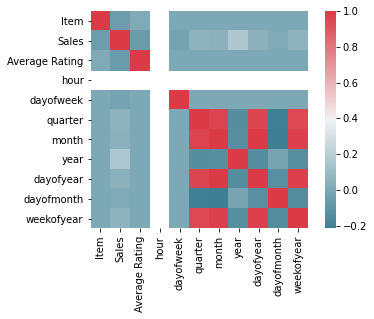

In [210]:
#Now applying the linear regression
import seaborn as sns
import numpy as np
corr = df2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


In [368]:
df2

,Date,Store,Item,Sales,Average Rating,Location,Category,Branding,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2017-01-01,0.1,1,13,2.8,0.1,0.14,0.04,0,6,1,1,2017,1,1,52
1,2017-02-01,0.1,1,11,1.4,0.1,0.14,0.04,0,2,1,2,2017,32,1,5
2,2017-03-01,0.1,1,14,1.8,0.1,0.14,0.04,0,2,1,3,2017,60,1,9
3,2017-04-01,0.1,1,13,1.3,0.1,0.14,0.04,0,5,2,4,2017,91,1,13
4,2017-05-01,0.1,1,10,2.9,0.1,0.14,0.04,0,0,2,5,2017,121,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820995,2021-06-26,0.099099,50,82,0.4,0.2,0.099099,0.059099,0,5,2,6,2021,177,26,25
820996,2021-06-27,0.099099,50,83,0.8,0.2,0.099099,0.059099,0,6,2,6,2021,178,27,25
820997,2021-06-28,0.099099,50,91,2.0,0.2,0.099099,0.059099,0,0,2,6,2021,179,28,26
820998,2021-06-29,0.099099,50,122,1.9,0.2,0.099099,0.059099,0,1,2,6,2021,180,29,26


In [505]:
#changing the data type of date
#import datetime as dt
#df2['Date'] = pd.to_datetime(df2['Date'])
#df2['Date']=df2['Date'].map(dt.datetime.toordinal)
#df2.columns

df3=df2[['Store','Item','Sales','year','month','dayofweek','quarter','dayofyear','dayofmonth','weekofyear','Category',\
        'Average Rating','Branding','Location']]


In [507]:
#plt.scatter(df2['Sales'],df2['Date'])
import numpy as np
df3['log_dy']=np.log2(df3['dayofyear'])
df3

,Store,Item,Sales,year,month,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,Category,Average Rating,Branding,Location,log_dy
0,0.1,1,13,2017,1,6,1,1,1,52,0.14,2.8,0.04,0.1,0.000000
1,0.1,1,11,2017,2,2,1,32,1,5,0.14,1.4,0.04,0.1,5.000000
2,0.1,1,14,2017,3,2,1,60,1,9,0.14,1.8,0.04,0.1,5.906891
3,0.1,1,13,2017,4,5,2,91,1,13,0.14,1.3,0.04,0.1,6.507795
4,0.1,1,10,2017,5,0,2,121,1,18,0.14,2.9,0.04,0.1,6.918863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820995,0.099099,50,82,2021,6,5,2,177,26,25,0.099099,0.4,0.059099,0.2,7.467606
820996,0.099099,50,83,2021,6,6,2,178,27,25,0.099099,0.8,0.059099,0.2,7.475733
820997,0.099099,50,91,2021,6,0,2,179,28,26,0.099099,2.0,0.059099,0.2,7.483816
820998,0.099099,50,122,2021,6,1,2,180,29,26,0.099099,1.9,0.059099,0.2,7.491853


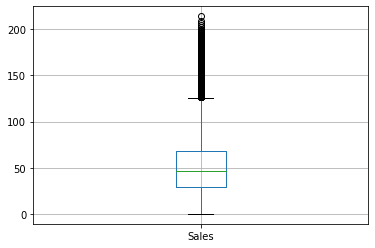

In [488]:
#Lets focus on outlier detection
bxplt=df2.boxplot(column=['Sales'])


## Now in this part we split the dataset after we are done with the data wrangling part
## and train the Linear Regression model

In [589]:
X=df3[['Item','year','quarter','Average Rating','Category','dayofmonth','weekofyear','month','year',\
       'dayofweek','Store','log_dy',\
       'Location']]

Y=df3['Sales']

In [243]:
#df2.to_csv("train_df.csv")

In [590]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30)

In [591]:
from sklearn import linear_model
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)


LinearRegression()

In [435]:
X_train

,Item,year,quarter,dayofmonth,weekofyear,month,Average Rating,dayofweek,Store,Category
570479,35,2018,4,7,49,12,2.8,4,0.1,0.099099
765273,47,2017,4,4,49,12,2.1,0,0.1,0.08
140840,9,2020,2,24,26,6,2.3,2,0.1,0.12
442983,27,2020,3,7,37,9,0.9,0,0.099099,0.14
230117,15,2017,3,26,34,8,2.4,5,0.1,0.14
...,...,...,...,...,...,...,...,...,...,...
482109,30,2019,4,1,40,10,3.6,1,0.1,0.14
77245,5,2017,1,13,11,3,1.5,0,0.1,0.14
672164,41,2018,4,8,41,10,0.3,0,0.099099,0.08
683306,42,2017,3,23,34,8,1.2,2,0.1,0.08


In [592]:
#we train an xgboost model
#import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
model = RandomForestRegressor(n_estimators=10, 
                               random_state = 0)
model.fit(X_train, Y_train)
# Predict the model
pred = model.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  15.076561


In [419]:
#using Xgboost
#from xgboost import XGBRegressor
#model2=XGBRegressor()
#model2.fit(X_train,Y_train)


In [570]:
model.score(X_train,Y_train)

0.9237935804332169

In [568]:
regr.score(X_train,Y_train)

0.15074871303606885

In [409]:
predicted=regr.predict(X_test)

In [410]:
print(predicted)
print(Y_test)

[47.15435385 48.68957936 56.78542791 ... 51.09734273 49.86861159
 42.25212883]
241524    103
8367       23
68017      27
766657      9
690032     28
         ... 
331824     38
429117     31
86327      82
241673     99
502646     51
Name: Sales, Length: 164200, dtype: int64


Feature: 0, Score: 0.31443
Feature: 1, Score: 1.82474
Feature: 2, Score: 5.55463
Feature: 3, Score: -1.79782
Feature: 4, Score: 280.47773
Feature: 5, Score: -0.08146
Feature: 6, Score: 0.58414
Feature: 7, Score: -7.28410
Feature: 8, Score: 1.82474
Feature: 9, Score: -0.33771
Feature: 10, Score: -20644.27549
Feature: 11, Score: 11.85814
Feature: 12, Score: -129.94342


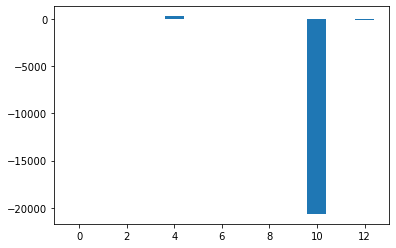

In [593]:
importance = regr.coef_
from matplotlib import pyplot
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [240]:
#we need to focus on smape
import numpy as np

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


In [571]:
print(smape(Y_test,pred))

22.88557353648075


## Now we predict the value from the test dataset which is provided to us
## We make use of the above model and then we predict the Sales value for the test dataset


In [315]:
#we read the test advanced dataset
test_df=pd.read_csv("test_advanced.csv")

In [316]:
test_df

,Date,Store,Item,Average Rating,Location,Category,Branding
0,7/1/2021,KMart,1,1.5,Wheelers Hill VIC 3170,Electronics,Sony
1,7/2/2021,KMart,1,1.8,Wheelers Hill VIC 3170,Electronics,Sony
2,7/3/2021,KMart,1,2.1,Wheelers Hill VIC 3170,Electronics,Sony
3,7/4/2021,KMart,1,2.5,Wheelers Hill VIC 3170,Electronics,Sony
4,7/5/2021,KMart,1,1.4,Wheelers Hill VIC 3170,Electronics,Sony
...,...,...,...,...,...,...,...
91995,12/27/2021,SupaIGA,50,1.6,NaN,Home & Kitchen,Westinghouse
91996,12/28/2021,SupaIGA,50,0.7,NaN,Home & Kitchen,Westinghouse
91997,12/29/2021,SupaIGA,50,1.4,NaN,Home & Kitchen,Westinghouse
91998,12/30/2021,SupaIGA,50,1.7,NaN,Home & Kitchen,Westinghouse


In [317]:
## we apply the same data wrangling steps above and then we prepare the test dataframe value for prediction
test_df['Date']=test_df['Date'].apply(lambda x: x.split('/'))
test_df['Date']=test_df['Date'].apply(lambda x : (x[1],x[0],x[2]) if (int(x[0])<int(x[1])) else (x[0],x[1],x[2]) )
test_df['Date']=test_df['Date'].apply(lambda x: (x[0]+'/'+x[1]+'/'+x[2]))



In [342]:
import datetime as dt
test_df['Date'] = pd.to_datetime(test_df['Date'])
#test_df['year']=test_df['Date'].dt.year 
#test_df['month']=test_df['Date'].dt.month 
#test_df['day']=test_df['Date'].dt.day
test_df['hour'] = test_df['Date'].dt.hour
test_df['dayofweek'] = test_df['Date'].dt.dayofweek
test_df['quarter'] = test_df['Date'].dt.quarter
test_df['month'] = test_df['Date'].dt.month
test_df['year'] = test_df['Date'].dt.year
test_df['dayofyear'] = test_df['Date'].dt.dayofyear
test_df['dayofmonth'] = test_df['Date'].dt.day
test_df['weekofyear'] = test_df['Date'].dt.weekofyear

In [322]:
test_df.describe(include=['O'])

,Store,Location,Category,Branding
count,92000,91816,92000,92000
unique,10,10,9,23
top,Costco,"Springvale, VIC, 3171, Australia",Food & Groceries,Nike
freq,9200,9200,12880,7360


In [141]:
import matplotlib.pyplot as plt

In [323]:
test_df

,Date,Store,Item,Average Rating,Location,Category,Branding,hour,dayofweek,month,year,dayofyear,dayofmonth,weekofyear
0,2021-07-01,KMart,1,1.5,Wheelers Hill VIC 3170,Electronics,Sony,0,3,7,2021,182,1,26
1,2021-07-02,KMart,1,1.8,Wheelers Hill VIC 3170,Electronics,Sony,0,4,7,2021,183,2,26
2,2021-07-03,KMart,1,2.1,Wheelers Hill VIC 3170,Electronics,Sony,0,5,7,2021,184,3,26
3,2021-07-04,KMart,1,2.5,Wheelers Hill VIC 3170,Electronics,Sony,0,6,7,2021,185,4,26
4,2021-07-05,KMart,1,1.4,Wheelers Hill VIC 3170,Electronics,Sony,0,0,7,2021,186,5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,2021-12-27,SupaIGA,50,1.6,NaN,Home & Kitchen,Westinghouse,0,0,12,2021,361,27,52
91996,2021-12-28,SupaIGA,50,0.7,NaN,Home & Kitchen,Westinghouse,0,1,12,2021,362,28,52
91997,2021-12-29,SupaIGA,50,1.4,NaN,Home & Kitchen,Westinghouse,0,2,12,2021,363,29,52
91998,2021-12-30,SupaIGA,50,1.7,NaN,Home & Kitchen,Westinghouse,0,3,12,2021,364,30,52


In [324]:
#In the same manner we asssign the value of counts(frequency) of each value on each column as it's value to avoid
# the curse of dimensionality
#removing the NaN values from the test_df dataframe
test_df.isnull().sum()


Date                0
Store               0
Item                0
Average Rating      0
Location          184
Category            0
Branding            0
hour                0
dayofweek           0
month               0
year                0
dayofyear           0
dayofmonth          0
weekofyear          0
dtype: int64

In [325]:
test_df.loc[test_df['Location'].isnull()==True,'Location']="Mulgrave VIC 3170"

In [326]:
test_df['Store'].value_counts()

Costco             9200
SupaIGA            9200
Asian SuperMart    9200
Woolies            9200
Target             9200
Big Savers         9200
BigW               9200
Coles              9200
Aldi               9200
KMart              9200
Name: Store, dtype: int64

In [327]:
#we do it for Store , Branding , Category and  Location
#Frequency before encoding
#Frequency use instead of label encoding

test_df.loc[test_df['Store']=='Target','Store']=9200/len(test_df)
test_df.loc[test_df['Store']=='Costco','Store']=9200/len(test_df)
test_df.loc[test_df['Store']=='Big Savers','Store']=9200/len(test_df)
test_df.loc[test_df['Store']=='Asian SuperMart','Store']=9200/len(test_df)
test_df.loc[test_df['Store']=='Woolies','Store']=9200/len(test_df)
test_df.loc[test_df['Store']=='BigW','Store']=9200/len(test_df)
test_df.loc[test_df['Store']=='Aldi','Store']=9200/len(test_df)
test_df.loc[test_df['Store']=='KMart','Store']=9200/len(test_df)
test_df.loc[test_df['Store']=='Coles','Store']=9200/len(test_df)
test_df.loc[test_df['Store']=='SupaIGA','Store']=9016/len(test_df)


In [328]:
test_df.describe(include=['O'])

,Store,Location,Category,Branding
count,92000.0,92000,92000,92000
unique,2.0,10,9,23
top,0.1,"Springvale, VIC, 3171, Australia",Food & Groceries,Nike
freq,82800.0,9200,12880,7360


In [329]:
test_df['Branding'].value_counts()

Nike              7360
Cadbury           5520
Zara              5520
Westinghouse      5520
Swisse            5520
Tommy Hilfiger    5520
Kogan             5520
Nestle            3680
Book Grocer       3680
LG                3680
Reebok            3680
Olay              3680
Typo              3680
Wayfair           3680
Kellogg's         3680
Sony              3680
Sistema           3680
Apple             3680
The Body Shop     3680
MAC               1840
Maybelline        1840
Puma              1840
Revlon            1840
Name: Branding, dtype: int64

In [330]:
#Now we do it for Branding 
test_df.loc[test_df['Branding']=='Nike','Branding']=7360
test_df.loc[((test_df['Branding']=='Cadbury') | (test_df['Branding']=='Tommy Hilfiger') |\
        (test_df['Branding']=='Zara') |(test_df['Branding']=='Kogan') | (test_df['Branding']=='Swisse')),\
        'Branding']=5520/len(test_df)

test_df.loc[test_df['Branding']=='Westinghouse', 'Branding']=5336/len(test_df)
test_df.loc[((test_df['Branding']=='Apple') | (test_df['Branding']=='Wayfair') |\
        (test_df['Branding']=='Sistema') | (test_df['Branding']=="Kellogg's") | (test_df['Branding']=='Swisse' )),\
        'Branding']=3680/len(test_df)
test_df.loc[((test_df['Branding']=='Nestle') | (test_df['Branding']=='Typo') |\
        (test_df['Branding']=='Olay') | (test_df['Branding']=='Kogan') | (test_df['Branding']=='The Body Shop')),\
        'Branding']=3680/len(test_df)
test_df.loc[((test_df['Branding']=='Reebok') | (test_df['Branding']=='Sony') |(test_df['Branding']=='LG') |\
        (test_df['Branding']=='Book Grocer')),\
        'Branding']=3680/len(test_df)
test_df.loc[((test_df['Branding']=='Revlon') | (test_df['Branding']=='MAC') |\
        (test_df['Branding']=='Puma') | (test_df['Branding']=='Maybelline')),\
        'Branding']=1840/len(test_df)



In [331]:
test_df.describe(include=['O'])

,Store,Location,Category,Branding
count,92000.0,92000,92000,92000.00
unique,2.0,10,9,5.00
top,0.1,"Springvale, VIC, 3171, Australia",Food & Groceries,0.04
freq,82800.0,9200,12880,44160.00


In [332]:
#Now we do it for Category
test_df['Category'].value_counts()

Food & Groceries          12880
Electronics               12880
Sports & Fitness          12880
Health & Wellbeing        12880
Clothing & Accessories    11040
Home & Kitchen             9200
Stationery                 7360
Miscellaneous              7360
Cosmetics                  5520
Name: Category, dtype: int64

In [333]:
test_df.loc[((test_df['Category']=='Sports & Fitness') | (test_df['Category']=='Health & Wellbeing') |\
        (test_df['Category']=='Food & Groceries') | (test_df['Category']=="Electronics") ),\
        'Category']=12880/len(test_df)
test_df.loc[test_df['Category']=='Clothing & Accessories','Category']=11040/len(test_df)
test_df.loc[test_df['Category']=='Cosmetics','Category']=5520/len(test_df)
test_df.loc[test_df['Category']=='Home & Kitchen','Category']=9016/len(test_df)
test_df.loc[((test_df['Category']=='Miscellaneous') | (test_df['Category']=='Stationery')),\
        'Category']=7360/len(test_df)


In [304]:
test_df.describe(include=['O'])

,Store,Location,Category,Branding
count,92000.0,92000,92000.00,92000.00
unique,2.0,10,5.00,5.00
top,0.1,"Springvale, VIC, 3171, Australia",0.14,0.04
freq,82800.0,9200,51520.00,44160.00


In [334]:
#Now we do it for Location
test_df['Location'].unique()

array(['Wheelers Hill VIC 3170', 'Preston,\xa0VIC,\xa03072',
       'South Melbourne,\xa0VIC\xa03205',
       'Keysborough, VIC, 3173, Australia', 'Mulgrave\xa0VIC\xa03170',
       'Dandenong, VIC, 3175, Australia',
       'Springvale, VIC, 3171, Australia', 'Ringwood VIC 3134',
       ' Epping VIC 3076', 'Mulgrave VIC 3170'], dtype=object)

In [335]:
test_df['Location'].value_counts()

Springvale, VIC, 3171, Australia     9200
Keysborough, VIC, 3173, Australia    9200
Mulgrave VIC 3170                    9200
Mulgrave VIC 3170                    9200
Preston, VIC, 3072                   9200
 Epping VIC 3076                     9200
Ringwood VIC 3134                    9200
Dandenong, VIC, 3175, Australia      9200
Wheelers Hill VIC 3170               9200
South Melbourne, VIC 3205            9200
Name: Location, dtype: int64

In [336]:
test_df.loc[(test_df['Location']=="Mulgrave\xa0VIC\xa03170"),'Location']="Mulgrave VIC 3170"
test_df.loc[(test_df['Location']=="Preston,\xa0VIC,\xa03072"),'Location']="Preston, VIC, 3072"
test_df.loc[(test_df['Location']=="South Melbourne,\xa0VIC\xa03205"),'Location']="South Melbourne, VIC 3205"


In [337]:
test_df['Location'].value_counts()

Mulgrave VIC 3170                    18400
Springvale, VIC, 3171, Australia      9200
Preston, VIC, 3072                    9200
Keysborough, VIC, 3173, Australia     9200
 Epping VIC 3076                      9200
Ringwood VIC 3134                     9200
Dandenong, VIC, 3175, Australia       9200
Wheelers Hill VIC 3170                9200
South Melbourne, VIC 3205             9200
Name: Location, dtype: int64

In [338]:
test_df.loc[((test_df['Location']=='Ringwood VIC 3134') | (test_df['Location']==' Epping VIC 3076') |\
        (test_df['Location']=='Preston, VIC, 3072')),\
        'Location']=9200/len(test_df)
test_df.loc[((test_df['Location']=='Keysborough, VIC, 3173, Australia') | (test_df['Location']=='South Melbourne, VIC 3205')|\
        (test_df['Location']=='Wheelers Hill VIC 3170')),\
        'Location']=9200/len(test_df)
test_df.loc[((test_df['Location']=='Dandenong, VIC, 3175, Australia') | (test_df['Location']=='Springvale, VIC, 3171, Australia')),\
        'Location']=9200/len(test_df)
test_df.loc[test_df['Location']=='Mulgrave VIC 3170',\
        'Location']=18400/len(test_df)

In [339]:
test_df.describe(include=['O'])

,Store,Location,Category,Branding
count,92000.0,92000.0,92000.00,92000.00
unique,2.0,2.0,5.00,5.00
top,0.1,0.1,0.14,0.04
freq,82800.0,73600.0,51520.00,44160.00


In [665]:
#we convert the date to ordinal

#test_df['Date']=test_df['Date'].map(dt.datetime.toordinal)

In [340]:
test_df["Store"].unique()
test_df.columns

Index(['Date', 'Store', 'Item', 'Average Rating', 'Location', 'Category',
       'Branding', 'hour', 'dayofweek', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

In [514]:
test_df2=test_df[['Store','Item','year','month','dayofweek','quarter','dayofyear','dayofmonth','weekofyear','Category',\
        'Average Rating','Location']]

In [132]:
#test_df['log_item']=np.log2(test_df['Item'])
#test_df['log_day']=np.log2(test_df['day'])

In [515]:
test_df2['log_dy']=np.log2(test_df2['dayofyear'])

In [557]:
#Now we create another
X_miss=test_df2[['Item','year','quarter','Average Rating','Category','dayofmonth','weekofyear','month','Average Rating','dayofweek','Store','log_dy',\
       'Location']]

In [558]:
X_miss

,Item,year,quarter,Average Rating,Category,dayofmonth,weekofyear,month,Average Rating,dayofweek,Store,log_dy,Location
0,1,2021,3,1.5,0.14,1,26,7,1.5,3,0.1,7.507795,0.1
1,1,2021,3,1.8,0.14,2,26,7,1.8,4,0.1,7.515700,0.1
2,1,2021,3,2.1,0.14,3,26,7,2.1,5,0.1,7.523562,0.1
3,1,2021,3,2.5,0.14,4,26,7,2.5,6,0.1,7.531381,0.1
4,1,2021,3,1.4,0.14,5,27,7,1.4,0,0.1,7.539159,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,50,2021,4,1.6,0.098,27,52,12,1.6,0,0.098,8.495855,0.2
91996,50,2021,4,0.7,0.098,28,52,12,0.7,1,0.098,8.499846,0.2
91997,50,2021,4,1.4,0.098,29,52,12,1.4,2,0.098,8.503826,0.2
91998,50,2021,4,1.7,0.098,30,52,12,1.7,3,0.098,8.507795,0.2


In [186]:
test_df.describe(include=['O'])



,Store,Location,Category,Branding
count,92000.0,92000.0,92000.00,92000.00
unique,2.0,2.0,5.00,5.00
top,0.1,0.1,0.14,0.04
freq,82800.0,73600.0,51520.00,44160.00


In [559]:
#Now we actually predict the test_df Sales values
predicted_test=model.predict(X_miss)

In [561]:
print(predicted_test)

[20.4   20.5   21.525 ... 61.5   64.1   60.4  ]


In [563]:
final_df=pd.DataFrame(predicted_test)

In [564]:
final_df.to_csv("final_submission16.csv")